# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.2.4'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('Total Harry Potter Movies:', len(hp_df))
hp_df.head(10)
hp_df.sort_values(by=['year'], ascending=False)

Total Harry Potter Movies: 8


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [33]:
len(movies[(movies.year >= 2000) & (movies.year >= 2000)])

115471

### Section I - Q4: How many movies are titled "Hamlet"?

In [34]:
hl_df = movies[movies.title.str.contains('Hamlet', case=False)]
print('Total Hamlet Movies:', len(hl_df))

Total Hamlet Movies: 57


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [37]:
new_hl_df= hl_df[hl_df.title.str.contains('Hamlet', case=False)]
new_hl_df=new_hl_df[new_hl_df.year>=2000]
new_hl_df=new_hl_df.sort_values(by=['year'], ascending=False)
new_hl_df

,title,year
78217,Hamlet: The Fall of a Sparrow,2018
244747,Hamlet,2017
240089,Hamlet in the Golden Vale,2017
50271,Hamlet/Horatio,2017
98329,Hamlet (II),2017
70547,Royal Shakespeare Company: Hamlet,2016
191940,Hamlet,2016
186137,Hamlet,2015
133802,National Theatre Live: Hamlet,2015
209533,"Hamlet, Son of a Kingpin",2015


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [44]:
ic_df= cast[cast.title.str.contains('Inception', case=False)]
len(ic_df[ic_df.n.isnull()])

36

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [50]:
len(ic_df[~ic_df.n.isnull()])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [53]:
ic_df.sort_values(by=['n'], ascending=False).iloc[0:10]

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [55]:
cast[cast.character=="Albus Dumbledore"]

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


In [56]:
cast[cast.character=="Albus Dumbledore"].name

704984            Dane Farwell
792421          Michael Gambon
792423          Michael Gambon
792424          Michael Gambon
947789          Richard Harris
947790          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [17]:
kr_df=cast[cast.name=="Keanu Reeves"]

len(kr_df)

62

In [19]:

#getting lead score of each movie title
leadscore=cast.groupby("title").n.max()

lead=kr_df[(kr_df.year >=1990) & (kr_df.n==1)]
print(lead)

                                 title  year          name   type  \
1892342                       47 Ronin  2013  Keanu Reeves  actor   
1892344           A Walk in the Clouds  1995  Keanu Reeves  actor   
1892345     Bill & Ted's Bogus Journey  1991  Keanu Reeves  actor   
1892347                 Chain Reaction  1996  Keanu Reeves  actor   
1892348                    Constantine  2005  Keanu Reeves  actor   
1892354              Feeling Minnesota  1996  Keanu Reeves  actor   
1892358                      Hard Ball  2001  Keanu Reeves  actor   
1892359                  Henry's Crime  2010  Keanu Reeves  actor   
1892361                      John Wick  2014  Keanu Reeves  actor   
1892362           John Wick: Chapter 2  2017  Keanu Reeves  actor   
1892364                Johnny Mnemonic  1995  Keanu Reeves  actor   
1892366                    Knock Knock  2015  Keanu Reeves  actor   
1892367                  Little Buddha  1993  Keanu Reeves  actor   
1892378                        Sib

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [137]:
print("actor roles",len(cast[(cast.type=="actor") & (cast.year>=1950) & (cast.year<=1960)]))
print("actress roles",len(cast[(cast.type=="actor") & (cast.year>=1950) & (cast.year<=1960)]))

actor roles 171302
actress roles 171302


In [138]:
print("actor roles",len(cast[(cast.type=="actor") & (cast.year>=2007) & (cast.year<=2017)]))
print("actress roles",len(cast[(cast.type=="actor") & (cast.year>=2007) & (cast.year<=2017)]))

actor roles 922782
actress roles 922782


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [21]:
len(cast[(cast.year>2000) & (cast.n==1)])

58535

In [22]:
len(cast[(cast.year>2000) & (cast.n>1)])

964463

In [23]:
len(cast[(cast.year>2000) & (cast.n.isna())])

875487

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [24]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
The Outsider            12
Temptation              12
Honeymoon               11
Freedom                 11
Othello                 11
The Three Musketeers    11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

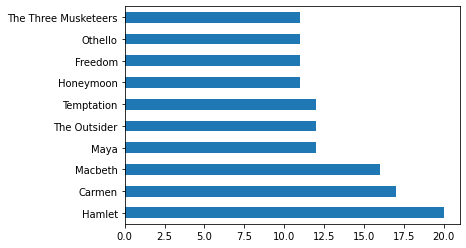

In [25]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

<AxesSubplot:>

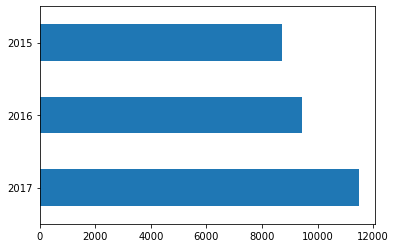

In [26]:
top_three = movies[movies.year>2000].year.value_counts()[:3]
top_three.plot(kind='barh')

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:>

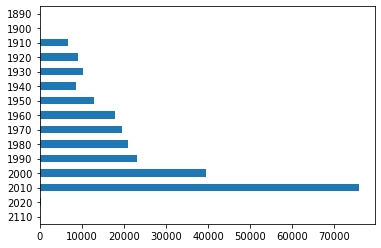

In [35]:
decade_df=movies.sort_values(by=['year'], ascending=True)
decade_df.year=decade_df.year-(decade_df.year%10)

decade_df.year.value_counts().sort_index(ascending=False).plot(kind='barh')


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [36]:
top_ten = cast.character.value_counts()[:10]
top_ten

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [37]:
top_ten = cast[cast.character=="Herself"].name.value_counts()[:10]
top_ten

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Hillary Clinton               8
Margaret Thatcher             8
In?s J. Southern              6
Oprah Winfrey                 6
Rekha                         6
Mar?a Isabel (III) Mart?n     6
Name: name, dtype: int64

In [38]:
top_ten = cast[cast.character=="Himself"].name.value_counts()[:10]
top_ten

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [40]:
top_ten = cast[cast.character.str.startswith("Zombie")].character.value_counts()[:10]
top_ten

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [41]:
top_ten = cast[cast.character.str.startswith("Police")].character.value_counts()[:10]
top_ten

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:>

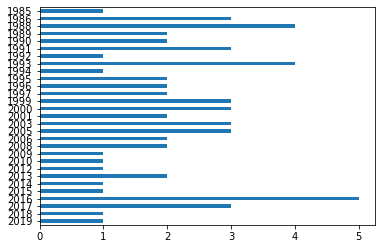

In [45]:
kr_df=cast[cast.name=="Keanu Reeves"]
kr_df.year.value_counts().sort_index(ascending=False).plot(kind='barh')


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:ylabel='year'>

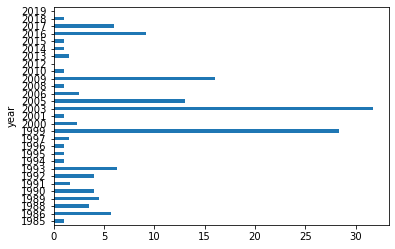

In [55]:
#many roles a year so I average n per year
kr_df.groupby("year").n.mean().plot(kind='barh')


### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:>

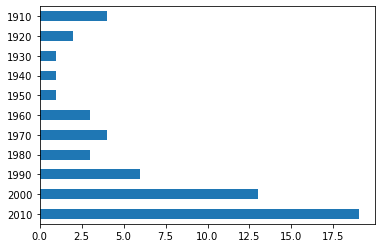

In [57]:
hl_df=movies[movies.title.str.contains('Hamlet', case=False)]
hl_df.year=hl_df.year-(hl_df.year%10)
hl_df.year.value_counts().sort_index(ascending=False).plot(kind='barh')


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [58]:
len(cast[(cast.n==1) & (cast.year>=1960) & (cast.year<1970)])

11823

In [59]:
len(cast[(cast.n==1) & (cast.year>=2000) & (cast.year<2010)])

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [73]:
fo_df=cast[cast.name=="Frank Oz"]
rolecount=fo_df.title.value_counts()
morethan2role_mvlist=rolecount[rolecount>=2].index
fo_df[fo_df.title.isin(morethan2role_mvlist)].sort_values(by=["year"])

,title,year,name,type,character,n
1723652,The Muppet Movie,1979,Frank Oz,actor,Motorcycle Guy,2.0
1723651,The Muppet Movie,1979,Frank Oz,actor,Swedish Chef (assistant),2.0
1723650,The Muppet Movie,1979,Frank Oz,actor,Marvin Suggs,2.0
1723649,The Muppet Movie,1979,Frank Oz,actor,Doc Hopper's Men,2.0
1723648,The Muppet Movie,1979,Frank Oz,actor,Sam the Eagle,2.0
1723647,The Muppet Movie,1979,Frank Oz,actor,Animal,2.0
1723646,The Muppet Movie,1979,Frank Oz,actor,Fozzie Bear,2.0
1723645,The Muppet Movie,1979,Frank Oz,actor,Miss Piggy,2.0
1723598,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0
1723637,The Great Muppet Caper,1981,Frank Oz,actor,Swedish Chef,2.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [77]:
fo_characters=fo_df[fo_df.title.isin(morethan2role_mvlist)].character.value_counts()
fo_characters[fo_characters>=2]

Animal            6
Miss Piggy        6
Sam the Eagle     5
Fozzie Bear       4
Cookie Monster    3
Bert              3
Grover            2
Name: character, dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

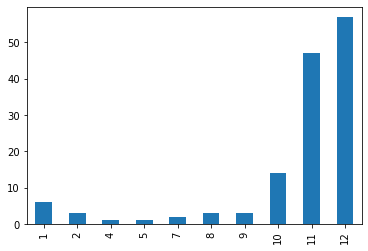

In [78]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

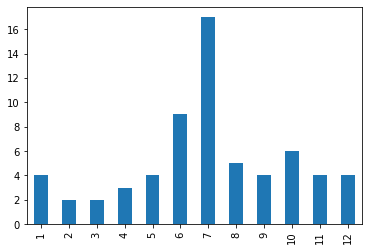

In [79]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

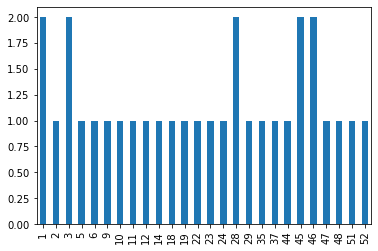

In [81]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [90]:
kr=cast.merge(release_dates,on=['title','year'])
kr=kr[(kr.name=="Keanu Reeves")]

In [91]:
kr[(kr.n==1) & (kr.country=="USA") ].sort_values(by="date")

,title,year,name,type,character,n,country,date
16837127,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
8395767,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
2709676,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
10232894,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
8629940,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
1803683,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
10458033,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
13350949,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
14609249,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
7805546,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

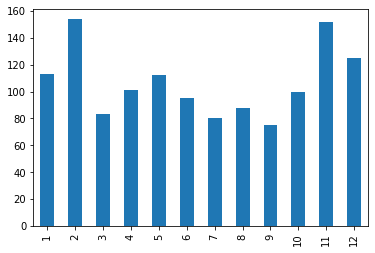

In [93]:
kr.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

In [96]:
im=cast.merge(release_dates,on=['title','year'])
im=im[(im.name=="Ian McKellen") & (im.country=="USA")]

im


,title,year,name,type,character,n,country,date
716836,The Golden Compass,2007,Ian McKellen,actor,Iorek Byrnison,6.0,USA,2007-12-07
1073038,The Wolverine,2013,Ian McKellen,actor,Magneto,NaN,USA,2013-07-26
1723028,Gods and Monsters,1998,Ian McKellen,actor,James Whale,1.0,USA,1998-11-04
1777762,Last Action Hero,1993,Ian McKellen,actor,Death,11.0,USA,1993-06-18
2063444,Six Degrees of Separation,1993,Ian McKellen,actor,Geoffrey,4.0,USA,1993-12-08
2409696,The Lord of the Rings: The Fellowship of the Ring,2001,Ian McKellen,actor,Gandalf,17.0,USA,2001-12-19
2415439,The Lord of the Rings: The Return of the King,2003,Ian McKellen,actor,Gandalf,20.0,USA,2003-12-17
2724879,Swept from the Sea,1997,Ian McKellen,actor,Dr. James Kennedy,3.0,USA,1998-01-23
3626461,X-Men: The Last Stand,2006,Ian McKellen,actor,Erik Lehnsherr,3.0,USA,2006-05-26
3626515,X-Men: The Last Stand,2006,Ian McKellen,actor,Magneto,3.0,USA,2006-05-26


<AxesSubplot:>

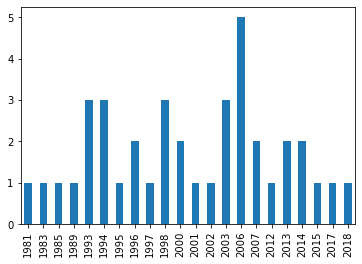

In [95]:
im.date.dt.year.value_counts().sort_index().plot(kind='bar')